In [273]:
from utils import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from matplotlib.collections import PatchCollection
from matplotlib.patches import Patch

In [97]:
path = 'setup1/'

outfile = path + f'all_data.npz'
data = np.load(outfile)


In [98]:
data.files

['X_all', 'Y_all', 'CGM_all']

In [107]:
X_all = data['X_all'].squeeze()
Y_all = data['Y_all'].squeeze()
CGM_all = data['CGM_all'].squeeze()

In [103]:
# Reshape for all other periods
CGM_ = CGM_all[1:,:,:].reshape((224*72,1000)) # Skip stationary phase

In [227]:
#### Stacked bar plots

CGM_ = CGM_all[1:,:,:].reshape((224*72,1000)) # Skip stationary phase

week = 1
start = (week-1) * 72 * 4 * 7
end = week * 72*4*7
CGM = CGM_[start:end,:]

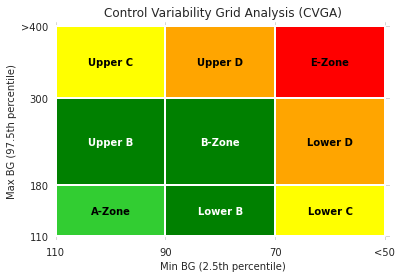

In [135]:
fig,ax = CVGA_background()

In [228]:
### Percentage stacked bar plot

In [274]:
CGM_list = [CGM_[(week-1)*72*4*7:week*72*4*7,:] for week in range(1,9)]

In [296]:
### Percentage stacked bar plot
def make_bar_plot(CGM_list, names = None, title = None):
    
    plt.figure(figsize=(5,10))

    barWidth = 0.5
    step = 0.65
    
    x = [0 + step * i for i in range(len(CGM_list))]
    xx = [i+1 for i in range(len(CGM_list))]
    
    if names == None:
        xx_ticks = xx
    
    for i,CGM in enumerate(CGM_list):
        O = (CGM < 3.0)
        a = (3.0 <= CGM) & (CGM < 3.9)
        b = (3.9 <= CGM) & (CGM < 10.0)
        c = (10.0 <= CGM) & (CGM < 13.9)
        d = (13.9 <= CGM) & (CGM < 40.0)
        E = (40.0 <= CGM)

        TOTAL = (CGM != np.nan).sum()

        Obar = O.sum()/TOTAL
        abar = a.sum()/TOTAL
        bbar = b.sum()/TOTAL
        cbar = c.sum()/TOTAL
        dbar = d.sum()/TOTAL
        Ebar = E.sum()/TOTAL


        plt.bar(x[i], Obar, edgecolor = 'black', width = barWidth, color ='black')
        plt.bar(x[i], abar, bottom = Obar ,edgecolor = 'black', width = barWidth, color ='mistyrose')
        plt.bar(x[i], bbar, bottom = abar+Obar, edgecolor = 'black', width = barWidth, color ='greenyellow')
        plt.bar(x[i], cbar, bottom = bbar+abar+Obar, edgecolor = 'black', width = barWidth, color ='lemonchiffon')
        plt.bar(x[i], dbar, bottom = cbar+bbar+abar+Obar, edgecolor = 'black', width = barWidth, color ='sandybrown')
        plt.bar(x[i], Ebar, bottom = dbar + cbar+bbar+abar+Obar, width = barWidth, color ='r', edgecolor = 'darkred')
    
    plt.xticks(x,xx_ticks)
    plt.xlabel('Week')
    plt.ylabel('Percentage')
    plt.title(title)
    plt.grid(False)
    
    # Custom legend
    legend_elements = [Patch(facecolor='black', label='$CGM > 40$'),
                       Patch(facecolor='mistyrose', label='$13.9 \leq CGM \leq 40$'),
                       Patch(facecolor='greenyellow', label='$10.0 \leq CGM \leq 13.9$'),
                       Patch(facecolor='lemonchiffon', label='$3.9 \leq CGM \leq 10.0$'),
                       Patch(facecolor='sandybrown', label='$3.9 \leq CGM \leq 3.0$'),
                       Patch(facecolor='darkred', label='$CGM < 3.0$')
                      ]
    # Patch(facecolor='darkred', label='$G<3.0$')
    plt.legend(handles=legend_elements,bbox_to_anchor=(1.04,0.5))
    
    plt.show()

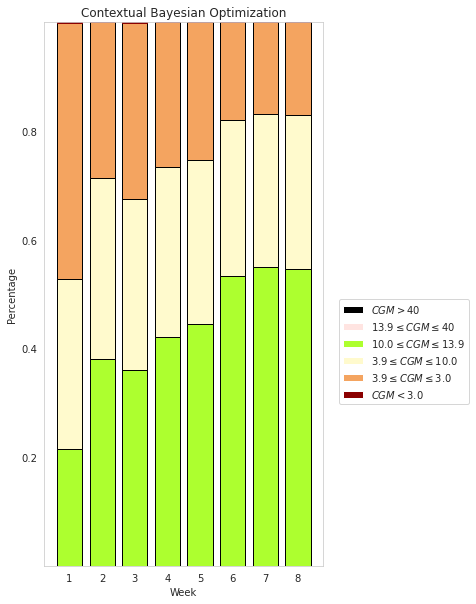

In [298]:
make_bar_plot(CGM_list, title = 'Contextual Bayesian Optimization')

In [303]:
### Boxplots

CGM_ = CGM_all[1:,:,:].reshape((224*72,1000)) # Skip stationary phase
week = 8
start = (week-1) * 72 * 4 * 7
end = week * 72*4*7
CGM = CGM_[start:end,:]


In [306]:
G = CGM
G.shape

(2016, 1000)

In [350]:
def make_box_plot(G, title = None):
    Total = G.shape[0]

    a = (G < 3.0).sum(axis=0)/Total
    b = ((G>=3.0) & (G<3.9)).sum(axis=0)/Total
    c = ((G>=3.9) & (G<10.0)).sum(axis=0)/Total
    d = ((G>=10.0) & (G<13.9)).sum(axis=0)/Total
    e = (G >= 13.9).sum(axis=0)/Total

    data = [a,b,c,d,e]

    plt.figure(figsize=(10,7))
    box = plt.boxplot(data,sym='+r', whiskerprops = dict(linestyle='--',linewidth=2), patch_artist=True)
    plt.ylabel('Percentage')
    plt.xticks([1,2,3,4,5],['$G<3.0$',
                            '$3.0 \leq G < 3.9$',
                            '$3.9 \leq G < 10.0$',
                            '$10.0 \leq G < 13.9$',
                            '$13.9 \leq G$'])

    colors = ['darkred', 'sandybrown', 'lemonchiffon', 'greenyellow', 'mistyrose']

    for patch,color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.title(title)
    plt.show()



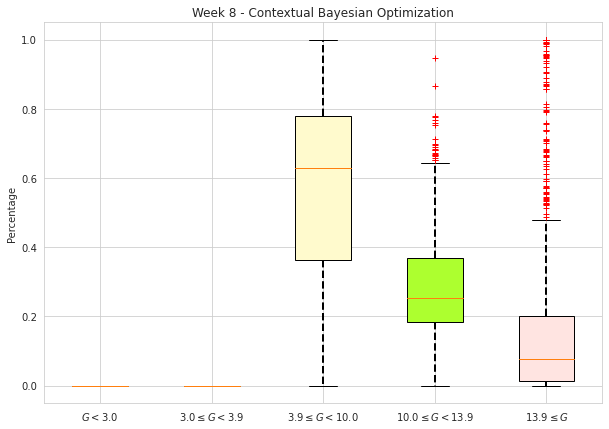

In [352]:
make_box_plot(G, title = f'Week {week} - Contextual Bayesian Optimization')

In [513]:
# CDF
week = 3
start = (week-1) * 72 * 4 * 7
end = week * 72*4*7
CGM = CGM_[start:end]
G = CGM

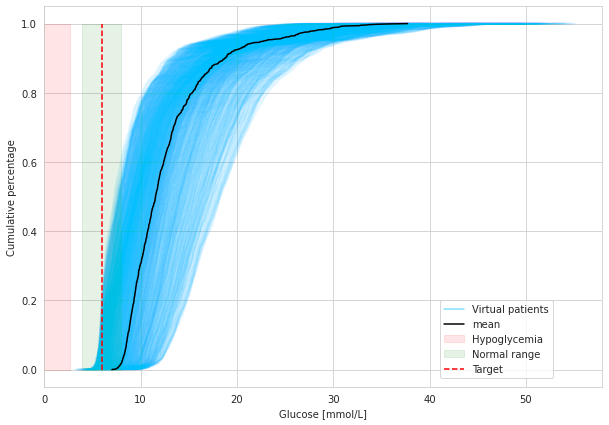

In [516]:
p = 1. * np.arange(G.shape[1]) / (G.shape[1] - 1)

G_sorted = np.sort(G,axis=1)
mu = np.mean(G,axis=0)
mu_sort = np.sort(mu)

plt.figure(figsize=(10,7))
plt.fill_between([0,2.7],0,1,color='r',alpha=0.1, label = 'Hypoglycemia')
plt.fill_between([3.9,8.0],0,1,color='g',alpha=0.1, label = 'Normal range')
plt.plot(G_sorted.T,p, color='deepskyblue', alpha=0.03) # Transpose to get correct dimension
plt.plot(0,0, color='deepskyblue', alpha=0.5, label = 'Virtual patients')
plt.plot(mu_sort,p,'-k', label = 'mean')
plt.xlabel('Glucose [mmol/L]')
plt.ylabel('Cumulative percentage')
plt.vlines(6,0,1,'r', linestyles='--', label = 'Target', zorder=3)
plt.title(title)
plt.xlim(left=0)
plt.legend(bbox_to_anchor=(0.92,0.24))
plt.show()

In [514]:
def make_CDF_all(G, title = None):
    
    
    p = 1. * np.arange(G.shape[1]) / (G.shape[1] - 1)

    G_sorted = np.sort(G,axis=1)
    mu = np.mean(G,axis=0)
    mu_sort = np.sort(mu)

    plt.figure(figsize=(10,7))
    plt.fill_between([0,2.7],0,1,color='r',alpha=0.1, label = 'Hypoglycemia')
    plt.fill_between([3.9,8.0],0,1,color='g',alpha=0.1, label = 'Normal range')
    plt.plot(G_sorted.T,p, color='deepskyblue', alpha=0.03) # Transpose to get correct dimension
    plt.plot(0,0, color='deepskyblue', alpha=0.5, label = 'Virtual patients')
    plt.plot(mu_sort,p,'-k', label = 'mean')
    plt.xlabel('Glucose [mmol/L]')
    plt.ylabel('Cumulative percentage')
    plt.vlines(6,0,1,'r', linestyles='--', label = 'Target', zorder=3)
    plt.title(title)
    plt.xlim(left=0)
    plt.legend(bbox_to_anchor=(0.92,0.24))
    plt.show()

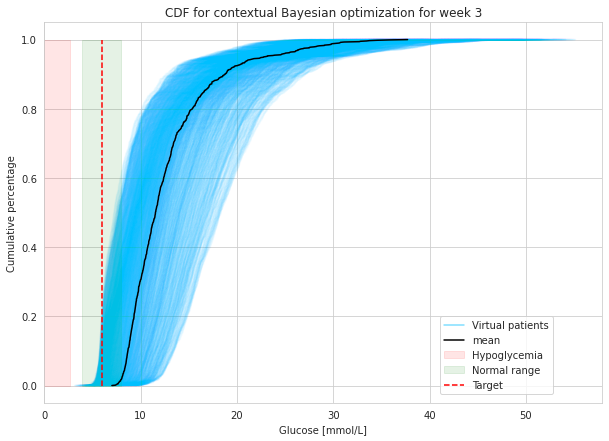

In [515]:
make_CDF_all(G, title =f'CDF for contextual Bayesian optimization for week {week}')

In [480]:
### Make CDF for CI
week = 8
start = (week-1) * 72 * 4 * 7
end = week * 72*4*7
CGM = CGM_[start:end]
G = CGM

In [481]:
G.shape

(2016, 1000)

In [486]:
def plot_CDF_CI(G, title = None):
    
    p = 1. * np.arange(G.shape[1]) / (G.shape[1] - 1)

    lower = np.quantile(G,0.025,axis=0)
    upper = np.quantile(G,0.975,axis=0)
    median = np.quantile(G,0.5,axis=0)
    mean = np.mean(G,axis=0)
    lowest = np.min(G,axis=0)
    highest = np.max(G,axis=0)

    things_to_plot = [lowest, lower, median, mean, upper, highest]
    labels = ['Min', '0.025 CI', 'Median', 'Mean', '0.975 CI', 'Max']

    plt.figure(figsize=(10,12))

    for i, thing in enumerate(things_to_plot):
        sorted_thing = np.sort(thing)
        plt.plot(sorted_thing,p,'-', label = labels[i])

    # Indicate CI

    sort_lower = np.sort(lower)
    sort_upper = np.sort(upper)
    plt.fill_betweenx(p,sort_lower,sort_upper, alpha=0.1, label ='95% CI')

    plt.fill_between([0,2.7],0,1,color='r',alpha=0.1, label = 'Hypoglycemia')
    plt.fill_between([3.9,8.0],0,1,color='g',alpha=0.1, label = 'Normal range')
    plt.xlabel('Glucose [mmol/L]')
    plt.ylabel('Cumulative percentage')
    plt.vlines(6,0,1,'r', linestyles='--', label = 'Target', zorder=3)
    plt.title(title)
    plt.xlim(left=0)
    plt.legend(bbox_to_anchor=(0.95,0.5))
    plt.show()

(1000,)


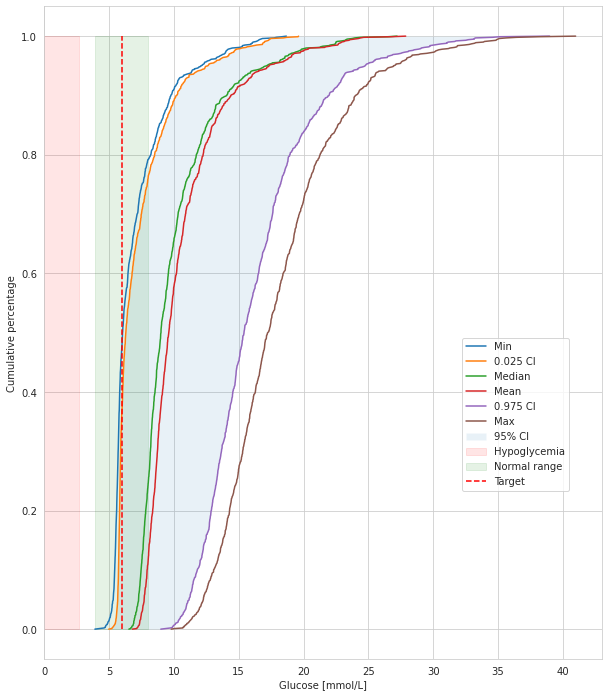

In [487]:
plot_CDF_CI(G)

In [476]:
### Final distribution plot
week = 8
start = (week-1) * 72 * 4 * 7
end = week * 72*4*7
CGM = CGM_[start:end]
G = CGM


mean = np.mean(G,axis=1)






In [477]:
mean.shape

(2016,)

In [392]:
### Week plot
week = 1
start = (week-1) * 72 * 4 * 7
end = week * 72*4*7
CGM__ = CGM_[start:end,:]
G = CGM__

In [449]:
## 
def plot_week(G, title = None, time_factor = 72*4):
    lower = np.quantile(G,0.025,axis=1)
    upper = np.quantile(G,0.975,axis=1)
    median = np.quantile(G,0.5,axis=1)
    mean = np.mean(G,axis=1)
    samples = G
    lowest = np.min(G,axis=1)
    highest = np.max(G,axis=1)

    # set time scale
    Tstart = 0
    Tend = G.shape[0]/time_factor
    time = np.linspace(Tstart, Tend, 2016)

    plt.figure(figsize=(12,7))
    plt.plot(time,samples, '-', alpha =0.05)
    plt.plot(time,highest,'r--', label = 'max')
    plt.plot(time,upper,linestyle='--', color='indigo',label ='upper 0.975 CI')
    plt.plot(time,mean,linestyle='--',color='cyan',label = 'mean')
    plt.plot(time,median,linestyle='--',color='yellow', label = 'median')
    plt.plot(time,lower,linestyle='--', color='lime', label = 'lower 0.025 CI')
    plt.plot(time,lowest,linestyle='--',color='magenta', label = 'min')
    plt.plot(0,0,linestyle='-',color='peru', label = f'{G.shape[1]} samples', alpha=0.5)
    
    plt.fill_between(time,3.9+0*time,8+0*time,color='g',alpha=0.2)
    plt.fill_between(time,0+0*time,2.7+0*time,color='r',alpha=0.2)
    plt.legend(bbox_to_anchor=(1.04,1))

    plt.title(title)
    plt.ylabel('CGM [mmol/L]')
    plt.xlabel('Day')
    plt.show()

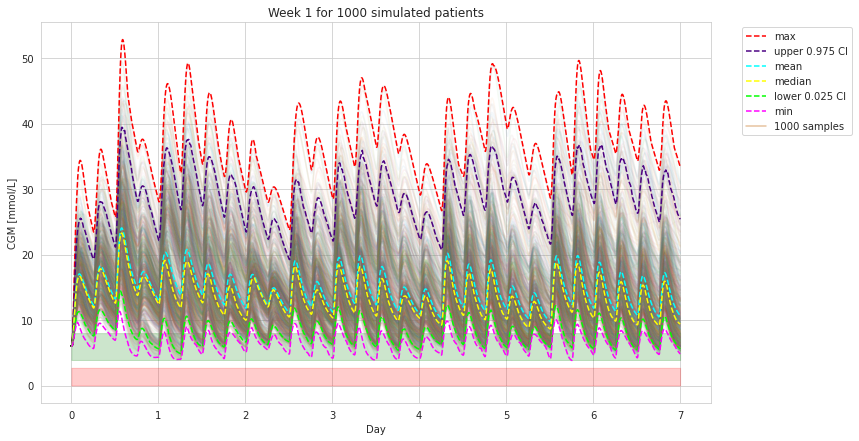

In [450]:
plot_week(G, title =f'Week {week} for {G.shape[1]} simulated patients')

In [ ]:
#### Baseline gradient